# Simple Demand understanding
---

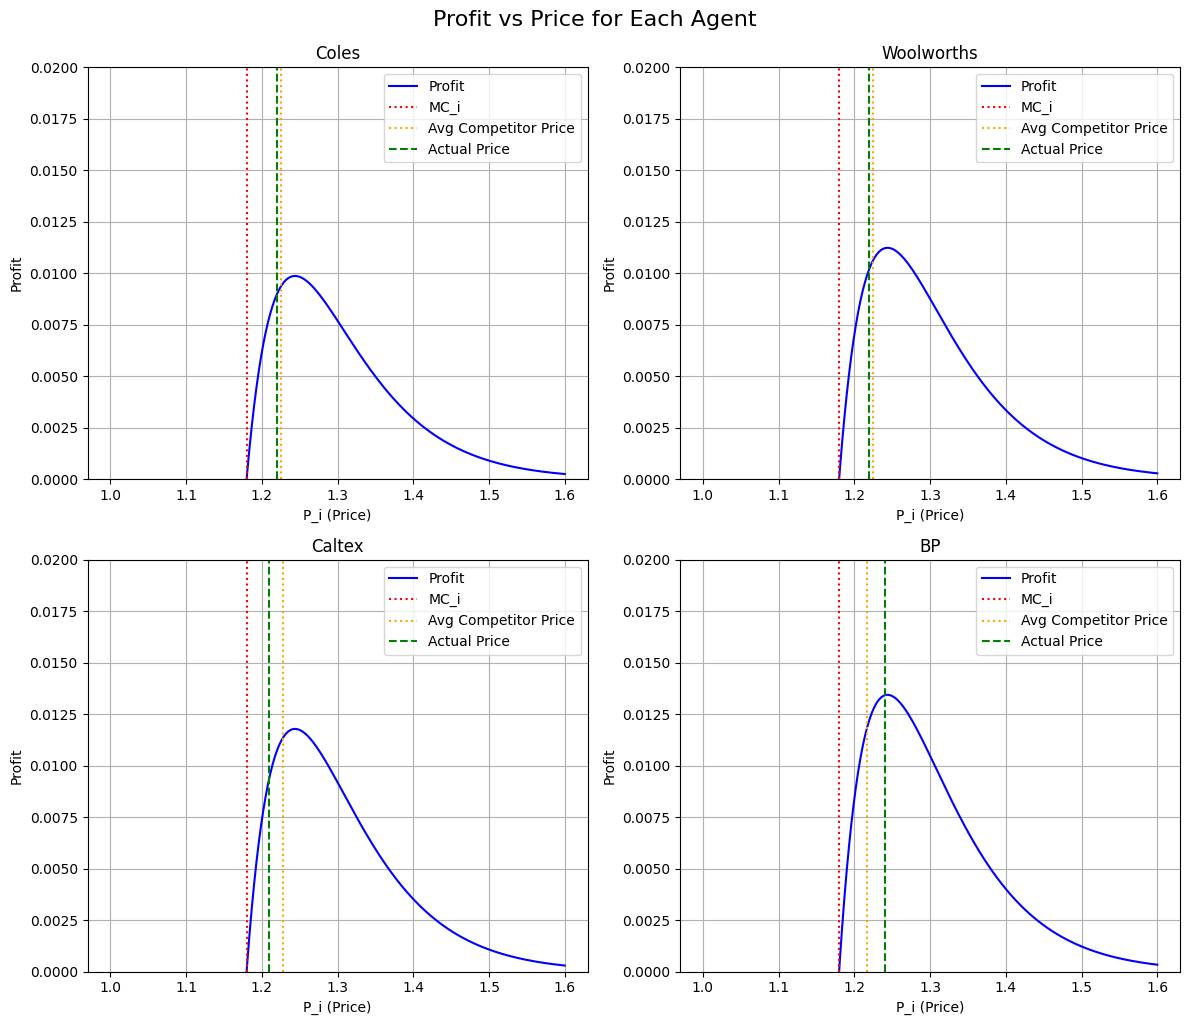

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Agent data. Prices for 2009-04-01
data = [
    {"agent": "Coles", "price": 1.22, "marginal_cost": 1.18, "market_share": 0.207},
    {
        "agent": "Woolworths",
        "price": 1.22,
        "marginal_cost": 1.18,
        "market_share": 0.235,
    },
    {"agent": "Caltex", "price": 1.21, "marginal_cost": 1.18, "market_share": 0.235},
    {"agent": "BP", "price": 1.24, "marginal_cost": 1.18, "market_share": 0.323},
]

LAMBDA = 15.66  # Penalty parameter
P_i_values = np.linspace(1.0, 1.6, 200)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for idx, agent_data in enumerate(data):
    name = agent_data["agent"]
    P_i_real = agent_data["price"]
    MC_i = agent_data["marginal_cost"]
    S_i = agent_data["market_share"]

    # Exclude current agent
    competitors = [d for j, d in enumerate(data) if j != idx]
    prices_excl_i = np.array([d["price"] for d in competitors])
    weights_excl_i = np.array([d["market_share"] for d in competitors])
    normalized_weights = weights_excl_i / np.sum(weights_excl_i)

    P_avg_weighted_competitors = np.average(prices_excl_i, weights=normalized_weights)

    profits = []
    for P_i in P_i_values:
        price_deviation = P_i - P_avg_weighted_competitors
        penalty = np.exp(-LAMBDA * price_deviation)
        profit = (P_i - MC_i) * S_i * penalty
        profits.append(profit)

    # Plot
    ax = axs[idx]
    ax.plot(P_i_values, profits, label="Profit", color="blue")
    ax.axvline(MC_i, color="red", linestyle=":", label="MC_i")
    ax.axvline(
        P_avg_weighted_competitors,
        color="orange",
        linestyle=":",
        label="Avg Competitor Price",
    )
    ax.axvline(P_i_real, color="green", linestyle="--", label="Actual Price")

    ax.set_title(f"{name}")
    ax.set_xlabel("P_i (Price)")
    ax.set_ylabel("Profit")
    ax.set_ylim(bottom=0, top=0.02)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.suptitle("Profit vs Price for Each Agent", fontsize=16, y=1.02)
plt.show()